# Testing the validity of the spectral data in SDSS Tables

Thara Rubi Caba Pineda

The aim of this work is to compare the line flux measurements done by two different scientific groups. I took only the objects with: `z < 0.35` and `S/N ratio > 10` (I used the `sn_Median in g-band`). The objects are classified as `class = ‘galaxy’`, `subclass = ‘AGN’` (in the `SpecObj Table`), and `Hbeta` and `[OIII]5007 EWs` are larger than 1 (I used the EWs from `emissionLinesPort`).

The spectral line measurements are done by these two groups:
1) MPA-JHU group (Tremonti et al (2004) and Brinchmann et al (2004)). Table: `galSpecLine`
2) Thomas et al. 2013, GANDALF code. Table: `emissionLinesPort`
I took the fluxes of `Hbeta` and `[OIII]5007` lines from both of these two tables.

The SQL code used:

`SELECT COUNT (*) 
FROM SpecObj AS s 
JOIN galSpecLine AS g ON s.specObjID = g.specObjID 
JOIN emissionLinesPort AS e ON s.specObjID= e.specObjID 
WHERE s.snMedian_g > 10 AND s.z < 0.35 AND s.class = 'GALAXY' 
AND s.subClass = 'AGN' AND e.EW_OIII_5006 > 1 
AND e.EW_Hb_4861 > 1 ` 

I found 6947 objects

## Data Processing

In [8]:
import pandas as pd
import os, sys
import matplotlib.pyplot as plt

In [9]:
data_dir = "/Users/tharacaba/Desktop/Big_data"

In [10]:
Larger = pd.read_csv(os.path.join(data_dir, 'Skyserver_SQL11_5_2024 2_29_31 PM.csv'), skiprows=1)

In [11]:
Larger

,h_beta_flux,oiii_5007_flux,Flux_Hb_4861,Flux_OIII_5006
0,53.03377,224.78980,136.87660,481.2657
1,73.30200,131.91280,224.13440,333.5330
2,13.80590,56.56305,36.94690,131.8787
3,48.38257,65.80047,90.58395,145.4132
4,28.43339,54.54528,164.17150,195.6070
...,...,...,...,...
6942,15.71928,130.96010,47.43714,325.6533
6943,206.77810,907.70720,125309.20000,1765.0920
6944,70.10352,435.79210,125.97150,723.5768
6945,30.59198,107.21320,68.77739,222.8692


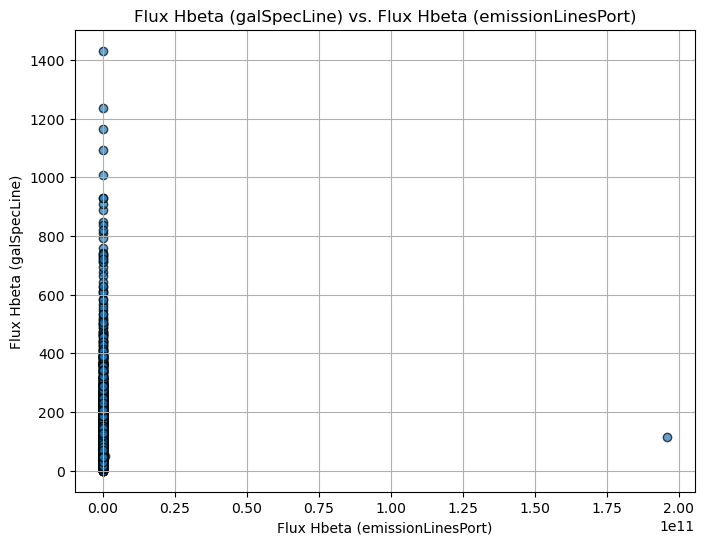

In [12]:
# Extract the relevant columns
flux_hbeta_galSpecLine = Larger['h_beta_flux']
flux_hbeta_emissionLinesPort = Larger['Flux_Hb_4861']

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(flux_hbeta_emissionLinesPort, flux_hbeta_galSpecLine, alpha=0.7, edgecolors='k')
plt.xlabel('Flux Hbeta (emissionLinesPort)')
plt.ylabel('Flux Hbeta (galSpecLine)')
plt.title('Flux Hbeta (galSpecLine) vs. Flux Hbeta (emissionLinesPort)')
plt.grid(True)
plt.show()

In [13]:
# Filter out extreme values
Larger_cleaned = Larger[(Larger['Flux_Hb_4861'] < 10000)]

## Plots for the larger data set

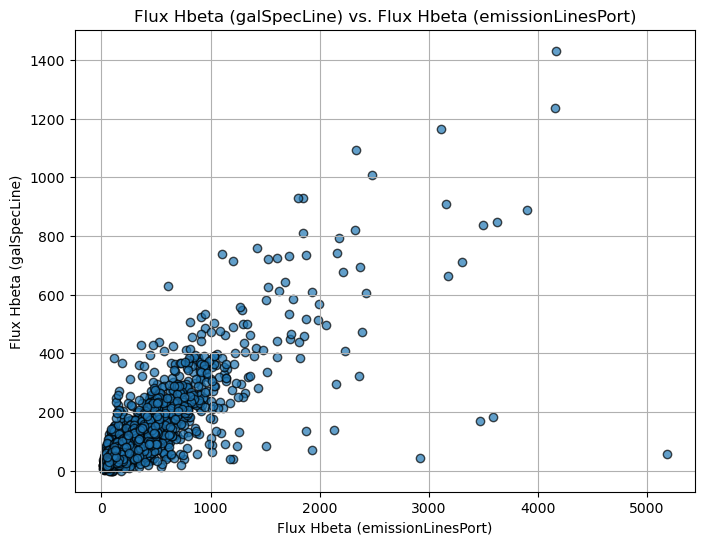

In [15]:
# Extract the relevant columns
flux_hbeta_galSpecLine = Larger_cleaned['h_beta_flux']
flux_hbeta_emissionLinesPort = Larger_cleaned['Flux_Hb_4861']

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(flux_hbeta_emissionLinesPort, flux_hbeta_galSpecLine, alpha=0.7, edgecolors='k')
plt.xlabel('Flux Hbeta (emissionLinesPort)')
plt.ylabel('Flux Hbeta (galSpecLine)')
plt.title('Flux Hbeta (galSpecLine) vs. Flux Hbeta (emissionLinesPort)')
plt.grid(True)
plt.show()

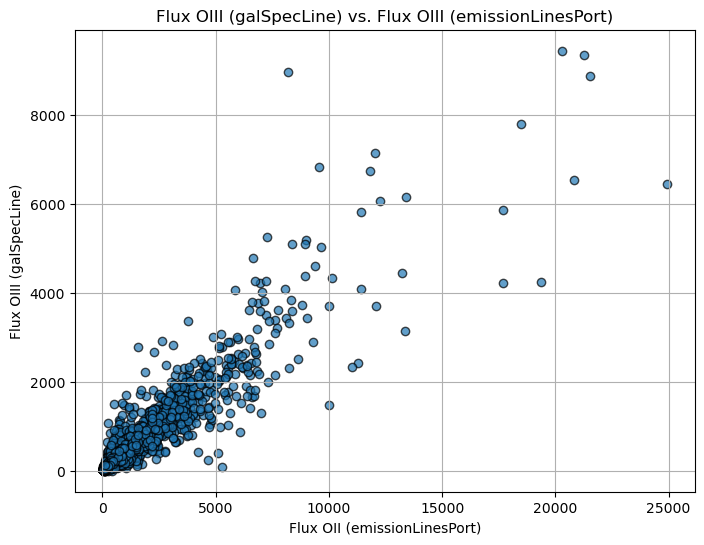

In [16]:
# Extract the relevant columns
flux_oiii_galSpecLine = Larger_cleaned['oiii_5007_flux']
flux_oiii_emissionLinesPort = Larger_cleaned['Flux_OIII_5006']

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(flux_oiii_emissionLinesPort, flux_oiii_galSpecLine,  alpha=0.7, edgecolors='k')
plt.xlabel('Flux OII (emissionLinesPort)')
plt.ylabel('Flux OIII (galSpecLine)')
plt.title('Flux OIII (galSpecLine) vs. Flux OIII (emissionLinesPort)')
plt.grid(True)
plt.show()

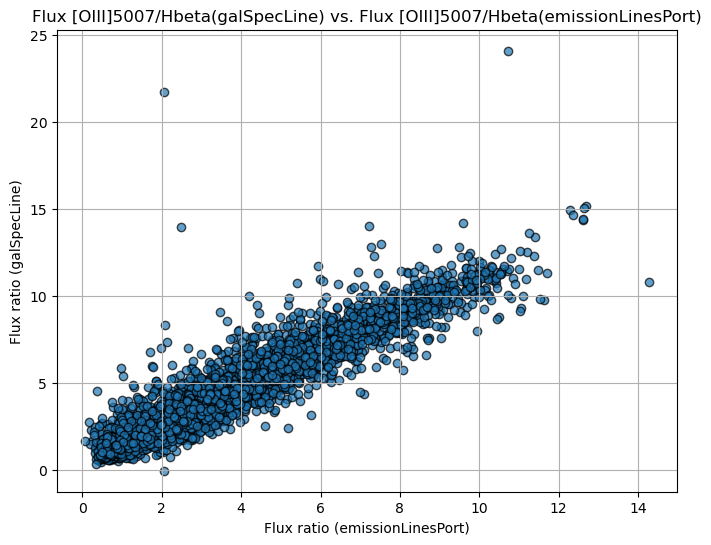

In [18]:
# Extract the relevant columns
flux_ratio_galSpecLine = Larger_cleaned['oiii_5007_flux']/Larger_cleaned['h_beta_flux']
flux_ratio_emissionLinesPort = Larger_cleaned['Flux_OIII_5006']/Larger_cleaned['Flux_Hb_4861']

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(flux_ratio_emissionLinesPort, flux_ratio_galSpecLine,  alpha=0.7, edgecolors='k')
plt.xlabel('Flux ratio (emissionLinesPort)')
plt.ylabel('Flux ratio (galSpecLine)')
plt.title('Flux [OIII]5007/Hbeta(galSpecLine) vs. Flux [OIII]5007/Hbeta(emissionLinesPort)')
plt.grid(True)
plt.show()

## Plot with the smaller data set

After this I did the same search, but with the additional criteria where only objects which estimated `Hbeta` and `OIII5007` flux errors are smaller than 10% of the measured flux values in `emissionLinesPort` table. 

The SQL code used:

`SELECT COUNT (*)
FROM SpecObj AS s
JOIN galSpecLine AS g ON s.specObjID = g.specObjID
JOIN emissionLinesPort AS e ON s.specObjID= e.specObjID
WHERE s.snMedian_g > 10 AND s.z < 0.35 AND s.class = 'GALAXY'
AND s.subClass = 'AGN' AND e.EW_OIII_5006 > 1
AND e.EW_Hb_4861 > 1  AND g.h_beta_flux_err < (g.h_beta_flux * 0.1)
AND g.oiii_5007_flux_err < (g.oiii_5007_flux * 0.1)
AND e.Flux_Hb_4861_Err < (e.Flux_Hb_4861 * 0.1)
AND e.Flux_OIII_5006_Err < (e.Flux_OIII_5006 * 0.1)`

I found 2695 objects

In [19]:
smaller = pd.read_csv(os.path.join(data_dir, 'Skyserver_CrossID11_6_2024 1_10_26 PM.csv'), skiprows=1)

In [20]:
smaller

,h_beta_flux,oiii_5007_flux,Flux_Hb_4861,Flux_OIII_5006
0,366.81100,4224.5420,632.7816,6958.9680
1,144.57410,1468.7300,319.5673,2907.0230
2,102.84150,300.3480,388.4274,1101.5070
3,88.92807,653.4301,131.9601,879.2584
4,133.48350,507.0995,249.6022,924.3002
...,...,...,...,...
2690,96.85313,404.6722,274.1832,1122.5200
2691,146.25270,522.7496,355.6400,1143.6800
2692,87.17483,247.2727,223.9280,559.8958
2693,226.55680,601.6732,726.1238,1917.5330


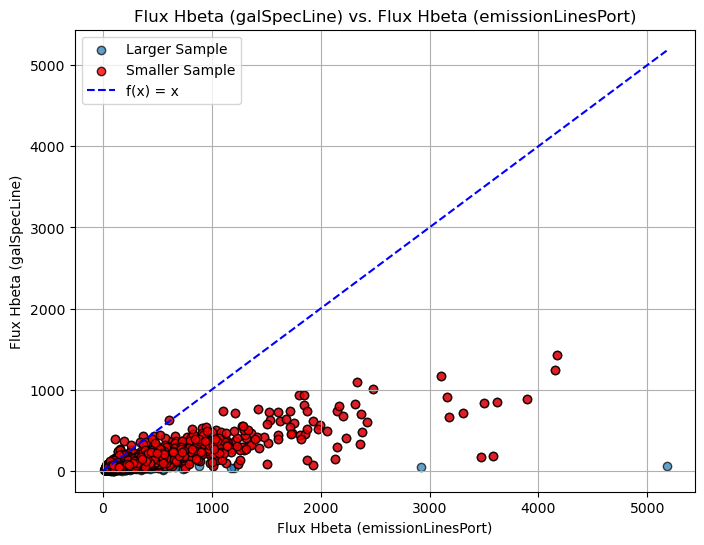

In [31]:
# Extract columns for the larger dataset
flux_hbeta_galSpecLine = Larger_cleaned['h_beta_flux']
flux_hbeta_emissionLinesPort = Larger_cleaned['Flux_Hb_4861']

# Define the range for the 1-to-1 line based on the data
min_val = min(flux_hbeta_emissionLinesPort.min(), flux_hbeta_galSpecLine.min())
max_val = max(flux_hbeta_emissionLinesPort.max(), flux_hbeta_galSpecLine.max())

# Filter out extreme values
Smaller_cleaned = smaller[(smaller['Flux_Hb_4861'] < 10000)]

# Extract columns for the smaller dataset
flux_hbeta_galSpecLine_small = Smaller_cleaned['h_beta_flux']
flux_hbeta_emissionLinesPort_small = Smaller_cleaned['Flux_Hb_4861']

# Plot the larger dataset
plt.figure(figsize=(8, 6))
plt.scatter(flux_hbeta_emissionLinesPort, flux_hbeta_galSpecLine,  
            alpha=0.7, edgecolors='k', label='Larger Sample')

# Overlay the smaller dataset with a different color
plt.scatter(flux_hbeta_emissionLinesPort_small, flux_hbeta_galSpecLine_small, 
            color='red', edgecolors='k', alpha=0.8, label='Smaller Sample')

# Plot the 1-to-1 line f(x) = x
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='f(x) = x')

# Labels and Title
plt.xlabel('Flux Hbeta (emissionLinesPort)')
plt.ylabel('Flux Hbeta (galSpecLine)')
plt.title('Flux Hbeta (galSpecLine) vs. Flux Hbeta (emissionLinesPort)')
plt.legend()
plt.grid(True)
plt.show()

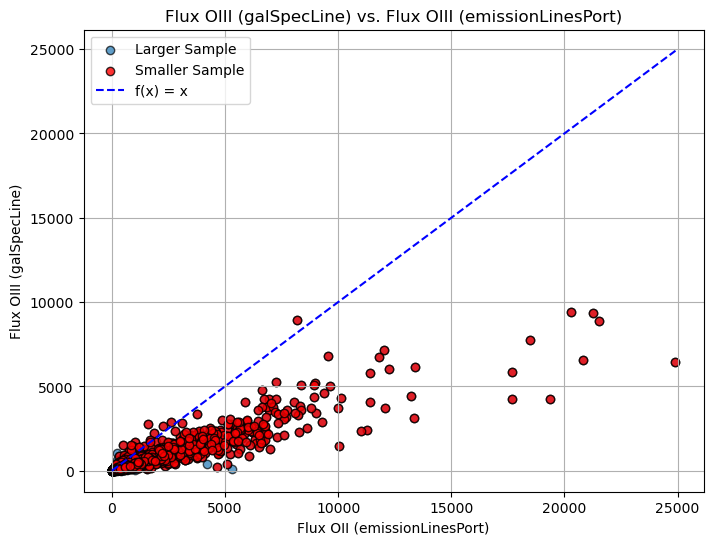

In [32]:
# Extract the relevant columns
flux_oiii_galSpecLine = Larger_cleaned['oiii_5007_flux']
flux_oiii_emissionLinesPort = Larger_cleaned['Flux_OIII_5006']

# Extract columns for the smaller dataset
flux_oiii_galSpecLine_small = Smaller_cleaned['oiii_5007_flux']
flux_oiii_emissionLinesPort_small = Smaller_cleaned['Flux_OIII_5006']

# Define the range for the 1-to-1 line based on the data
min_val = min(flux_oiii_emissionLinesPort.min(), flux_oiii_galSpecLine.min())
max_val = max(flux_oiii_emissionLinesPort.max(), flux_oiii_galSpecLine.max())

# Plot the larger dataset
plt.figure(figsize=(8, 6))
plt.scatter(flux_oiii_emissionLinesPort, flux_oiii_galSpecLine, 
            alpha=0.7, edgecolors='k', label='Larger Sample')

# Overlay the smaller dataset with a different color
plt.scatter(flux_oiii_emissionLinesPort_small, flux_oiii_galSpecLine_small, 
            color='red', edgecolors='k', alpha=0.8, label='Smaller Sample')

# Plot the 1-to-1 line f(x) = x
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='f(x) = x')

# Labels and Title
plt.xlabel('Flux OII (emissionLinesPort)')
plt.ylabel('Flux OIII (galSpecLine)')
plt.title('Flux OIII (galSpecLine) vs. Flux OIII (emissionLinesPort)')
plt.legend()
plt.grid(True)
plt.show()

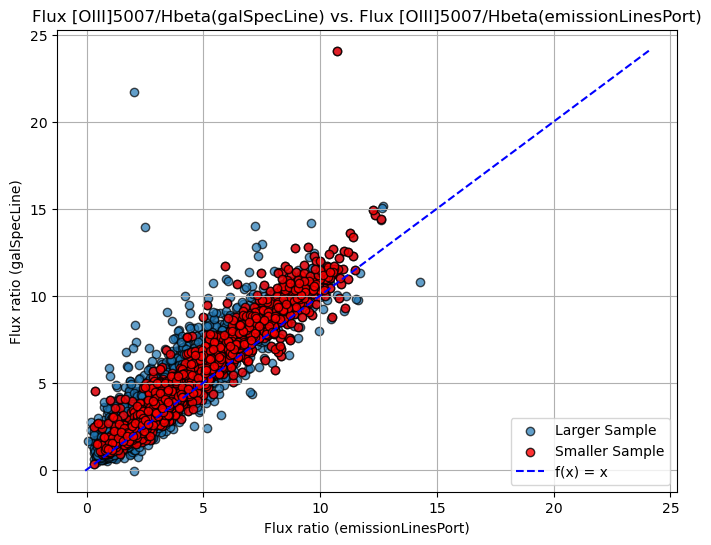

In [38]:
# Extract the relevant columns
flux_ratio_galSpecLine = Larger_cleaned['oiii_5007_flux']/Larger_cleaned['h_beta_flux']
flux_ratio_emissionLinesPort = Larger_cleaned['Flux_OIII_5006']/Larger_cleaned['Flux_Hb_4861']

# Extract columns for the smaller dataset
flux_ratio_galSpecLine_small = Smaller_cleaned['oiii_5007_flux']/Smaller_cleaned['h_beta_flux']
flux_ratio_emissionLinesPort_small = Smaller_cleaned['Flux_OIII_5006']/Smaller_cleaned['Flux_Hb_4861']

# Define the range for the 1-to-1 line based on the data
min_val = min(flux_ratio_emissionLinesPort.min(), flux_ratio_galSpecLine.min())
max_val = max(flux_ratio_emissionLinesPort.max(), flux_ratio_galSpecLine.max())

# Plot the larger dataset
plt.figure(figsize=(8, 6))
plt.scatter(flux_ratio_emissionLinesPort, flux_ratio_galSpecLine, 
            alpha=0.7, edgecolors='k', label='Larger Sample')

# Overlay the smaller dataset with a different color
plt.scatter(flux_ratio_emissionLinesPort_small, flux_ratio_galSpecLine_small, 
            color='red', edgecolors='k', alpha=0.8, label='Smaller Sample')

# Plot the 1-to-1 line f(x) = x
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='f(x) = x')

# Labels and Title
plt.xlabel('Flux ratio (emissionLinesPort)')
plt.ylabel('Flux ratio (galSpecLine)')
plt.title('Flux [OIII]5007/Hbeta(galSpecLine) vs. Flux [OIII]5007/Hbeta(emissionLinesPort)')
plt.legend()
plt.grid(True)
plt.show()

## Pearson coefficient of correlation and P-value

In [39]:
from scipy.stats import pearsonr

In [47]:
# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(flux_hbeta_galSpecLine, flux_hbeta_emissionLinesPort)
print(pearson_corr, p_value)

0.8384004719241266 0.0


In [48]:
# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(flux_oiii_galSpecLine, flux_oiii_emissionLinesPort)
print(pearson_corr, p_value)

0.9298902028483405 0.0


In [52]:
import numpy as np
# Combine the two ratios into a DataFrame for easier filtering
ratio_data = pd.DataFrame({
    'flux_ratio_galSpecLine': flux_ratio_galSpecLine,
    'flux_ratio_emissionLinesPort': flux_ratio_emissionLinesPort
})

# Remove rows with NaN or inf values
ratio_data = ratio_data.replace([np.inf, -np.inf], np.nan).dropna()

# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(ratio_data['flux_ratio_galSpecLine'], ratio_data['flux_ratio_emissionLinesPort'])
print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.9501521152125868
P-value: 0.0


## Final plots

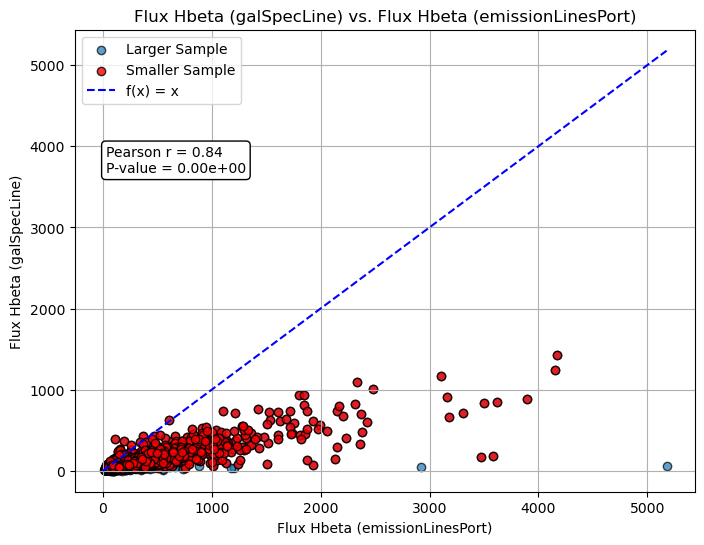

In [55]:
# Extract columns for the larger dataset
flux_hbeta_galSpecLine = Larger_cleaned['h_beta_flux']
flux_hbeta_emissionLinesPort = Larger_cleaned['Flux_Hb_4861']

# Define the range for the 1-to-1 line based on the data
min_val = min(flux_hbeta_emissionLinesPort.min(), flux_hbeta_galSpecLine.min())
max_val = max(flux_hbeta_emissionLinesPort.max(), flux_hbeta_galSpecLine.max())

# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(flux_hbeta_galSpecLine, flux_hbeta_emissionLinesPort)

# Extract columns for the smaller dataset
flux_hbeta_galSpecLine_small = Smaller_cleaned['h_beta_flux']
flux_hbeta_emissionLinesPort_small = Smaller_cleaned['Flux_Hb_4861']

# Plot the larger dataset
plt.figure(figsize=(8, 6))
plt.scatter(flux_hbeta_emissionLinesPort, flux_hbeta_galSpecLine,  
            alpha=0.7, edgecolors='k', label='Larger Sample')

# Overlay the smaller dataset with a different color
plt.scatter(flux_hbeta_emissionLinesPort_small, flux_hbeta_galSpecLine_small, 
            color='red', edgecolors='k', alpha=0.8, label='Smaller Sample')

# Plot the 1-to-1 line f(x) = x
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='f(x) = x')

# Add text for Pearson correlation coefficient and p-value
plt.text(0.05, 0.75, f'Pearson r = {pearson_corr:.2f}\nP-value = {p_value:.2e}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Labels and Title
plt.xlabel('Flux Hbeta (emissionLinesPort)')
plt.ylabel('Flux Hbeta (galSpecLine)')
plt.title('Flux Hbeta (galSpecLine) vs. Flux Hbeta (emissionLinesPort)')
plt.legend()
plt.grid(True)
plt.show()

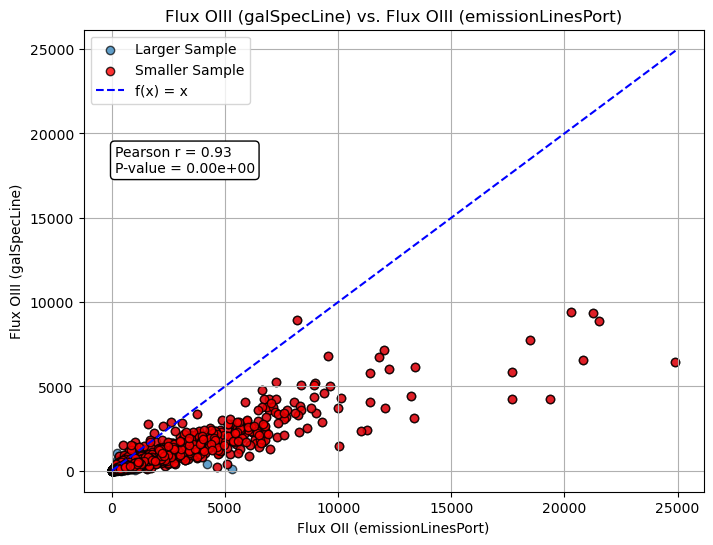

In [56]:
# Extract the relevant columns
flux_oiii_galSpecLine = Larger_cleaned['oiii_5007_flux']
flux_oiii_emissionLinesPort = Larger_cleaned['Flux_OIII_5006']

# Extract columns for the smaller dataset
flux_oiii_galSpecLine_small = Smaller_cleaned['oiii_5007_flux']
flux_oiii_emissionLinesPort_small = Smaller_cleaned['Flux_OIII_5006']

# Define the range for the 1-to-1 line based on the data
min_val = min(flux_oiii_emissionLinesPort.min(), flux_oiii_galSpecLine.min())
max_val = max(flux_oiii_emissionLinesPort.max(), flux_oiii_galSpecLine.max())

# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(flux_oiii_galSpecLine, flux_oiii_emissionLinesPort)

# Plot the larger dataset
plt.figure(figsize=(8, 6))
plt.scatter(flux_oiii_emissionLinesPort, flux_oiii_galSpecLine, 
            alpha=0.7, edgecolors='k', label='Larger Sample')

# Overlay the smaller dataset with a different color
plt.scatter(flux_oiii_emissionLinesPort_small, flux_oiii_galSpecLine_small, 
            color='red', edgecolors='k', alpha=0.8, label='Smaller Sample')

# Plot the 1-to-1 line f(x) = x
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='f(x) = x')

# Add text for Pearson correlation coefficient and p-value
plt.text(0.05, 0.75, f'Pearson r = {pearson_corr:.2f}\nP-value = {p_value:.2e}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Labels and Title
plt.xlabel('Flux OII (emissionLinesPort)')
plt.ylabel('Flux OIII (galSpecLine)')
plt.title('Flux OIII (galSpecLine) vs. Flux OIII (emissionLinesPort)')
plt.legend()
plt.grid(True)
plt.show()

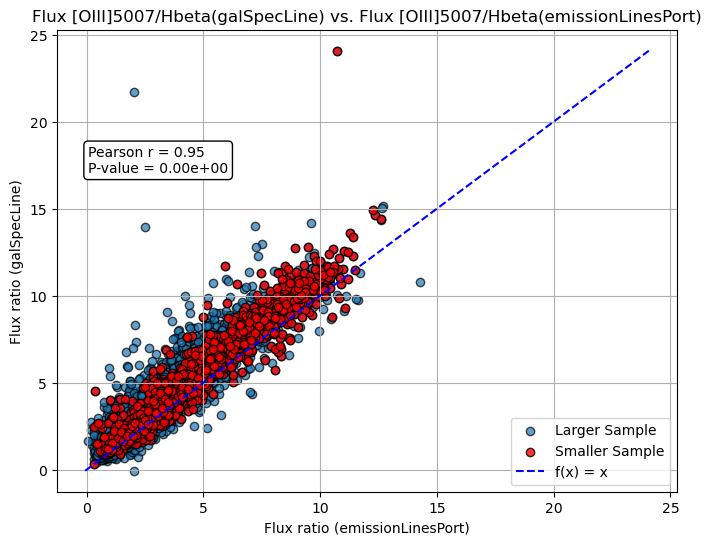

In [57]:
# Extract the relevant columns
flux_ratio_galSpecLine = Larger_cleaned['oiii_5007_flux']/Larger_cleaned['h_beta_flux']
flux_ratio_emissionLinesPort = Larger_cleaned['Flux_OIII_5006']/Larger_cleaned['Flux_Hb_4861']

# Extract columns for the smaller dataset
flux_ratio_galSpecLine_small = Smaller_cleaned['oiii_5007_flux']/Smaller_cleaned['h_beta_flux']
flux_ratio_emissionLinesPort_small = Smaller_cleaned['Flux_OIII_5006']/Smaller_cleaned['Flux_Hb_4861']

# Define the range for the 1-to-1 line based on the data
min_val = min(flux_ratio_emissionLinesPort.min(), flux_ratio_galSpecLine.min())
max_val = max(flux_ratio_emissionLinesPort.max(), flux_ratio_galSpecLine.max())

# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(ratio_data['flux_ratio_galSpecLine'], ratio_data['flux_ratio_emissionLinesPort'])

# Plot the larger dataset
plt.figure(figsize=(8, 6))
plt.scatter(flux_ratio_emissionLinesPort, flux_ratio_galSpecLine, 
            alpha=0.7, edgecolors='k', label='Larger Sample')

# Overlay the smaller dataset with a different color
plt.scatter(flux_ratio_emissionLinesPort_small, flux_ratio_galSpecLine_small, 
            color='red', edgecolors='k', alpha=0.8, label='Smaller Sample')

# Plot the 1-to-1 line f(x) = x
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='f(x) = x')

# Add text for Pearson correlation coefficient and p-value
plt.text(0.05, 0.75, f'Pearson r = {pearson_corr:.2f}\nP-value = {p_value:.2e}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))


# Labels and Title
plt.xlabel('Flux ratio (emissionLinesPort)')
plt.ylabel('Flux ratio (galSpecLine)')
plt.title('Flux [OIII]5007/Hbeta(galSpecLine) vs. Flux [OIII]5007/Hbeta(emissionLinesPort)')
plt.legend()
plt.grid(True)
plt.show()

## Final thoughts

1) Taking into account the deviation from 1-to-1 line, obtained coefficients of correlations, and comparison of the samples with larger and smaller errors in measurements, what can we conclude from this little test about limitations of usage of SDSS measured parameters?

The Pearson correlation coefficients are relatively high (0.84, 0.93, and 0.95), indicating a strong positive relationship between the parameters measured by `galSpecLine` and `emissionLinesPort`. However, there is noticeable deviation from the 1-to-1 line, especially at higher values. This deviation suggests that while the measurements from both are correlated, they may not be identical, and systematic differences could exist, especially for larger flux values.

The larger deviation at higher flux values could indicate that SDSS parameters are reliable only within a certain range. Beyond that range, measurement errors or systematic offsets may increase, potentially due to calibration differences between `galSpecLine` and `emissionLinesPort`.

2) If we use the spectra from DR18 for our research, and we want to add to our data some already measured line fluxes from SDSS tables, which table is better to use, `galSpecLine` or `emissionLinesPort`?

It seems that `emissionLinesPort` better captures objects with higher fluxes.